In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


# Точечный график

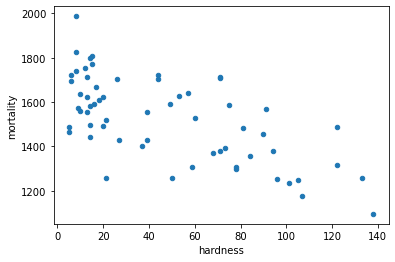

In [53]:
df.plot(kind='scatter', x='hardness', y='mortality') # Есть обратная линейная корреляция между показателями

# Коэфициенты регрессии

In [54]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [55]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [56]:
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.00000,-0.44918
mortality,-0.44918,1.00000


# Модель линейной регрессии

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [58]:
X = df[['hardness']]
y = df['mortality']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
model.coef_

array([-3.13167087])

In [62]:
model.intercept_

1668.9722977277095

In [63]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [64]:
model.score(X_test, y_test) # Коэфициент детерминации

0.5046490611017092

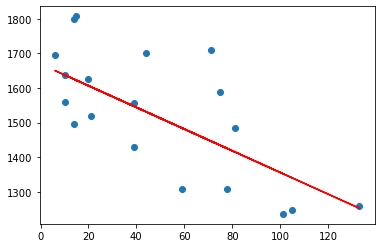

In [65]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r') # график линейной регрессии

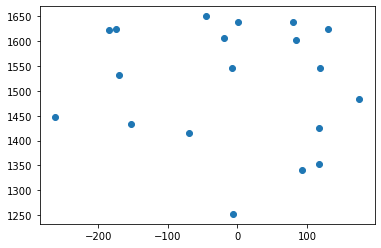

In [66]:
plt.scatter((y_pred - y_test), y_pred) # график остатков

# Делим данные на 2 группы по региону и провереям наличие связи между жесткостью воды и смертностью

In [67]:
# Для южных регионов (вывод - корреляция слабее, регрессии нет)

In [68]:
south_df = df[(df['location'] == 'South')]

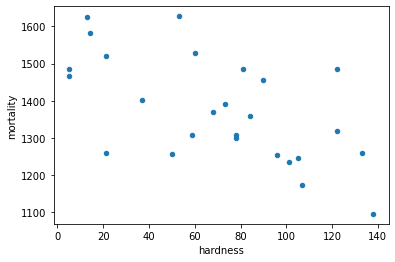

In [69]:
south_df.plot(kind='scatter', x='hardness', y='mortality') # обратная линейная корреляци слабее

In [70]:
south_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [71]:
south_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [72]:
south_df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.00,-0.44
mortality,-0.44,1.00


In [73]:
X1 = south_df[['hardness']]
y1 = south_df['mortality']

In [74]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [75]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [76]:
model.coef_

array([-3.51342921])

In [77]:
model.intercept_

1640.2204603423374

In [78]:
y1_pred = model.predict(X1_test)
y1_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [79]:
model.score(X1_test, y1_test) # Коэфициент детерминации, он меньше 0, значит регрессии нету

-2.551922301235205

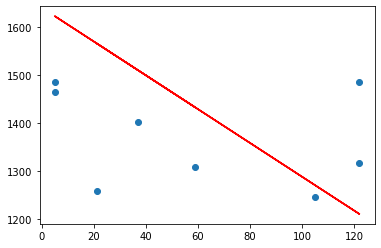

In [80]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y1_pred, c='r') # график линейной регрессии (ее нету)

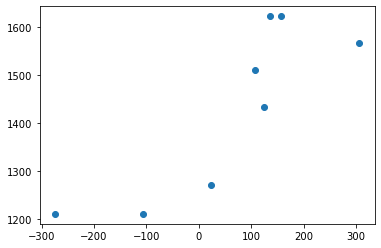

In [81]:
plt.scatter((y1_pred - y1_test), y1_pred) # график остатков

In [ ]:
# Для северных регионов (вывод - корреляция слабее, регрессии нет)

In [82]:
north_df = df[(df['location'] == 'North')]

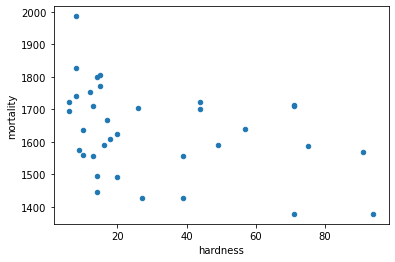

In [83]:
north_df.plot(kind='scatter', x='hardness', y='mortality') # обратная линейная корреляци еще слабее, почти нет

In [84]:
north_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [85]:
north_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [86]:
north_df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.284034
mortality,-0.284034,1.000000


In [87]:
X2 = north_df[['hardness']]
y2 = north_df['mortality']

In [88]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [89]:
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [90]:
model.coef_

array([-1.97686226])

In [91]:
model.intercept_

1688.150229031281

In [92]:
y2_pred = model.predict(X2_test)
y2_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [93]:
model.score(X2_test, y2_test) # Коэфициент детерминации, он почт равен 0, значит регрессии нету

0.018885304285745863

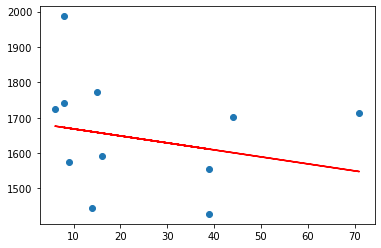

In [94]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_pred, c='r') # график линейной регрессии (ее нету)

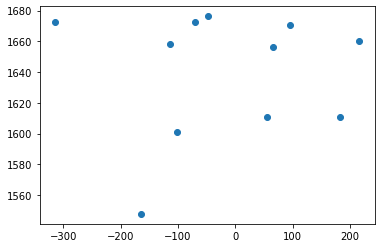

In [95]:
plt.scatter((y2_pred - y2_test), y2_pred) # график остатков

In [ ]:
#Выводы - связь между жесткостью воды и смертностью населения в общем случае есть, но когда мы делим на группы, связь пропадает